In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import scipy.stats as ss

### Getting the data ready

In [6]:
df = pd.read_csv('Churn_Modelling.csv')

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
# Dropping RowNumber, CustomerID, and Surname
df.drop(['CustomerId', 'RowNumber', 'Surname'], axis=1, inplace=True)

In [9]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
#Checking for missing values
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [12]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [13]:
df.dtypes[df.dtypes == object]

Geography    object
Gender       object
dtype: object

In [14]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [15]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

### Outlier Detection

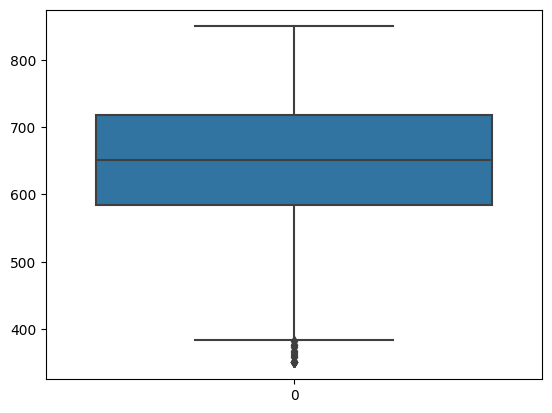

In [16]:
sns.boxplot(df.CreditScore)

plt.show()

In [17]:
# Looking at z-scores greater than +-3

zs = ss.zscore(df[['CreditScore', 'Balance', 'EstimatedSalary']])
outliers = zs[np.abs(zs.values)>3]
outliers

,CreditScore,Balance,EstimatedSalary
1405,-3.016383,0.837606,0.814944
1631,-3.109504,1.221131,1.597758
1838,-3.109504,0.532858,0.408848
1962,-3.026730,1.074721,0.728058
2473,-3.099157,1.388918,1.209082
8723,-3.109504,-1.225848,0.447481
8762,-3.109504,-1.225848,0.238332
9624,-3.109504,0.554746,1.256024


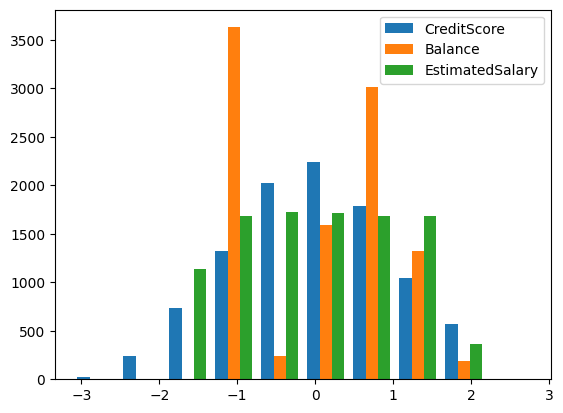

In [20]:
plt.hist(zs)
plt.legend(zs.columns)
plt.show()

We can drop the values with absolute zscores greater 3

In [19]:
df = df.drop(outliers.index)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### Data Preprocessing

In [21]:
# Function to create dummy columns for variables
def dummy(col_name):
    return pd.get_dummies(df, columns=col_name, drop_first=True, dtype=float)

In [22]:
# Creating dummy variables for object columns
df = dummy(['Geography', 'Gender'])

In [23]:
# Checking which features need to be scaled down
scaling_req = []
for _ in df.columns:
    if df[_].dtype!=object and df[_].max()-df[_].min()>=10:    
        scaling_req.append(_)
        
scaling_req

['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

In [24]:
# Scaling down the features
sc = StandardScaler()
df[scaling_req] = sc.fit_transform(df[scaling_req])

In [25]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,-0.329821,0.294397,-1.042285,-1.225585,1,1,1,0.022556,1,0.0,0.0,0.0
1,-0.444026,0.199023,-1.388144,0.117671,1,0,1,0.217196,0,0.0,1.0,0.0
2,-1.544551,0.294397,1.032870,1.333428,3,1,0,0.241348,1,0.0,0.0,0.0
3,0.500763,0.008276,-1.388144,-1.225585,2,0,0,-0.108243,0,0.0,0.0,0.0
4,2.068491,0.389770,-1.042285,0.786078,1,1,1,-0.364591,0,0.0,1.0,0.0


In [26]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
count,9.992000e+03,9.992000e+03,9.992000e+03,9.992000e+03,9992.000000,9992.000000,9992.000000,9.992000e+03,9992.000000,9992.000000,9992.000000,9992.000000
mean,1.649779e-16,-2.780446e-16,4.337781e-17,1.685335e-16,1.530324,0.705464,0.515212,-2.510224e-16,0.203062,0.250901,0.247698,0.545837
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,0.581537,0.455857,0.499794,1.000050e+00,0.402299,0.433553,0.431697,0.497919
min,-2.987691e+00,-1.994572e+00,-1.734004e+00,-1.225585e+00,1.000000,0.000000,0.000000,-1.739529e+00,0.000000,0.000000,0.000000,0.000000
25%,-6.932017e-01,-6.593403e-01,-6.964259e-01,-1.225585e+00,1.000000,0.000000,0.000000,-8.536686e-01,0.000000,0.000000,0.000000,0.000000
50%,1.279501e-02,-1.824719e-01,-4.707452e-03,3.314515e-01,1.000000,1.000000,1.000000,1.437129e-03,0.000000,0.000000,0.000000,1.000000
75%,6.980271e-01,4.851440e-01,6.870110e-01,8.201729e-01,2.000000,1.000000,1.000000,8.577731e-01,0.000000,1.000000,0.000000,1.000000
max,2.068491e+00,5.063081e+00,1.724589e+00,2.795762e+00,4.000000,1.000000,1.000000,1.737802e+00,1.000000,1.000000,1.000000,1.000000


Clearly, all the data that we scaled down is now standardized i.e. has $$\mu\approx 0$$ and $$\sigma\approx 1$$

### Looking at the relationship between the columns

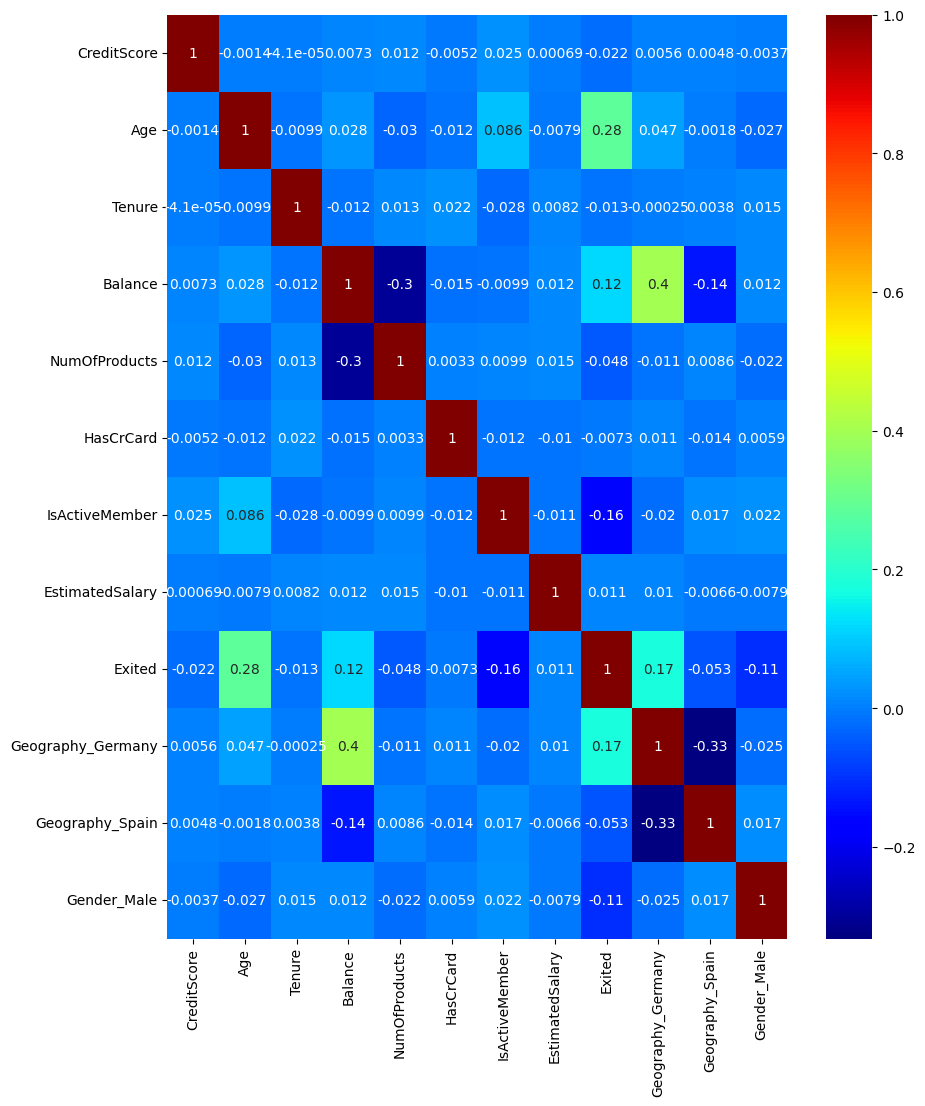

In [27]:
plt.figure(figsize=(10, 12))
sns.heatmap(df.corr(), annot=True, cmap='jet')
plt.show()

`Age`, `Balance`, and `Geography` have some sort of correlation with the target variable `Exited`.

In [28]:
cat = df[['HasCrCard', 'IsActiveMember', 'Geography_Germany', 'Geography_Spain', 'Gender_Male']]

In [29]:
# Identifying the most important categorical features using Chi-Sqaure
from sklearn.feature_selection import chi2

X = cat
y = df.Exited

chi_vals = chi2(X, y)

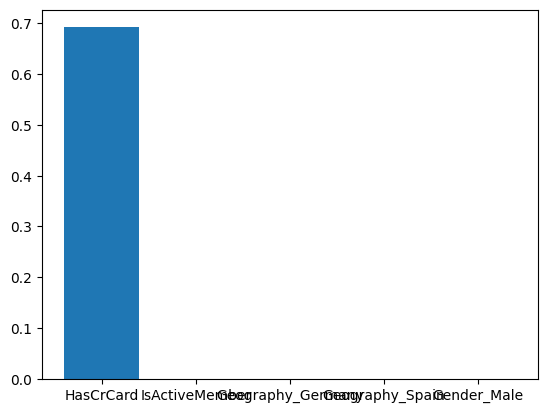

In [30]:
p_vals = pd.Series(chi_vals[1],index = X.columns)
plt.bar(X.columns, p_vals)
plt.show()

`HasCrCard` seems to have the highest p-value which implies that removing `HasCrCard` will not affect the predictions at all.

### Running the model through PCA

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
np.ascontiguousarray(pca.fit_transform(X))

array([[ 0.02064154,  0.55184474,  0.43414194],
       [-0.45190508,  0.22206835,  0.9687166 ],
       [ 0.60872929, -0.25088733,  0.35649088],
       ...,
       [-0.03517212,  0.57717391,  0.53111147],
       [ 0.50114037, -0.20727224, -0.85429342],
       [ 0.60872929, -0.25088733,  0.35649088]])

In [32]:
pca.components_

array([[ 0.05581366, -0.58808775,  0.43178952, -0.41673296, -0.53937843],
       [-0.02532916,  0.80273207,  0.3593935 , -0.35510556, -0.31577842],
       [-0.09696953,  0.07765106, -0.43208654,  0.43760512, -0.77869776]])

In [33]:
pca.explained_variance_ratio_

array([0.24156848, 0.22611549, 0.22461115])

Since not much variance is being explained by the top featues, we will not reduce the dimensionality further.

In [34]:
df.Exited.value_counts()

Exited
0    7963
1    2029
Name: count, dtype: int64

In [35]:
df[df.Exited==0].shape

(7963, 12)

In [36]:
2037/7963

0.25580811252040686

### Undersampling

In [37]:
from sklearn.model_selection import train_test_split

exit = df[df.Exited==0]
X_over, X_under, y_over, y_under = train_test_split(exit, exit.Exited, test_size = 0.3)

In [38]:
X_under.shape

(2389, 12)

In [39]:
X_under['Exited'] = y_under

In [40]:
X_under

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
9588,-1.160405,0.294397,-1.388144,1.623014,1,1,0,0.086280,0,1.0,0.0,1.0
5266,1.663582,-0.754714,0.687011,0.662479,1,1,1,1.431418,0,0.0,0.0,1.0
9849,0.282735,-0.468593,0.341152,-1.225585,2,1,1,0.426730,0,0.0,0.0,0.0
3825,-1.066965,0.485144,1.032870,-1.225585,1,1,0,-1.444307,0,0.0,1.0,1.0
4578,0.417705,-0.087098,-1.388144,-1.225585,2,0,0,-0.963281,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
708,-0.734731,-0.373219,1.032870,-1.225585,2,0,1,-1.559639,0,0.0,0.0,0.0
7676,-2.011754,-0.563967,0.687011,0.823371,1,0,1,-0.696202,0,0.0,0.0,0.0
5966,-1.482257,0.389770,1.378730,-1.225585,1,1,0,0.063903,0,0.0,0.0,0.0
9706,-1.440728,-0.850088,0.341152,-1.225585,2,1,0,-0.195173,0,0.0,0.0,0.0


In [62]:
final_df = pd.concat([df[df.Exited == 1], X_under])

In [63]:
final_df.Exited.value_counts()

Exited
0    2389
1    2029
Name: count, dtype: int64

In [64]:
final_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,-0.329821,0.294397,-1.042285,-1.225585,1,1,1,0.022556,1,0.0,0.0,0.0
2,-1.544551,0.294397,1.032870,1.333428,3,1,0,0.241348,1,0.0,0.0,0.0
5,-0.059881,0.485144,1.032870,0.597671,2,1,0,0.864287,1,0.0,1.0,1.0
7,-2.852721,-0.945461,-0.350567,0.618362,4,1,0,0.335511,1,1.0,0.0,0.0
16,0.023177,1.820376,-1.388144,0.899749,1,1,0,-1.651090,1,1.0,0.0,1.0


In [65]:
# Shuffling the dataset so the Exited class is not divided in 2 parts 
final_df = final_df.sample(frac=1).reset_index(drop=True)

In [66]:
final_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,-0.558232,2.011123,-1.734004,0.886529,1,0,0,-1.553614,1,0.0,0.0,0.0
1,1.725875,1.534255,1.724589,0.658668,1,1,0,-0.071468,1,0.0,0.0,0.0
2,2.068491,-0.087098,-1.388144,1.119988,1,0,1,0.066953,0,0.0,1.0,1.0
3,-0.132557,-1.136209,-0.350567,0.939709,1,1,1,1.503603,1,1.0,0.0,1.0
4,-0.475173,1.629628,-1.388144,-0.037457,2,1,1,-0.658181,1,1.0,0.0,0.0
